### Author

**Name:** Simar Malhan  
**Place:** Toronto, ON, Canada  
**Email:** malhan.simar24@gmail.com  
[LinkedIn](https://www.linkedin.com/in/simarmalhan)

### Project Overview

#### Diabetes Prediction System Using KNN Algorithm
This project focuses on developing a system to predict the likelihood of diabetes in individuals using the K-Nearest Neighbors (KNN) algorithm. The primary objective is to build a reliable model that can classify whether a person is diabetic based on various health parameters. The project involves data preprocessing, exploratory data analysis, and implementing the KNN algorithm to achieve accurate predictions. The outcomes will provide insights into which factors contribute most significantly to diabetes prediction and evaluate the performance of the model.

### Description of the Dataset

I’ve obtained the subjected dataset from Kaggle , however the dataset was initially presented by the National Institute of Diabetes and Digestive and Kidney Diseases .The dataset is consist of predictive variables and Outcome in which it describes if a person is a diabetes of not. The dataset represents a list of study from different patients that leads to classification of either diabetic or not. For this coursework I will use these presented data and adopt a Knn algorithm to test some given data of patients and see if they are under either category diabetes or non-diabetic. Total number of studied list in this dataset related to diabetic and non-diabetic patient is 768 , which we will manipulate ,scrap and clean these data to use them in our KNN predictive model.
Before we start working on our predictive model using Knn algorithm , we need to know a bit about what is KNN algorithm .

KNN algorithm is a supervised machine learning algorithm that deals with similarity . KNN stands for K-Nearest Neighbors. It’s basically a classification algorithm that will make a prediction of a class of a target variable based on a defined number of nearest neighbors. It will calculate distance from the instance you want to classify to every instance of the training dataset, and then classify your instance based on the majority classes of k nearest instances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/simarmalhan/Downloads/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Manipulating and Cleaning the dataset

In [9]:
cols_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in cols_clean:
    data[column] = data[column].replace(0, np.NaN)
    cols_mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN, cols_mean)
datacleaned = data
datacleaned.head().style.highlight_max(color = 'lightblue').highlight_min(color = 'red')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


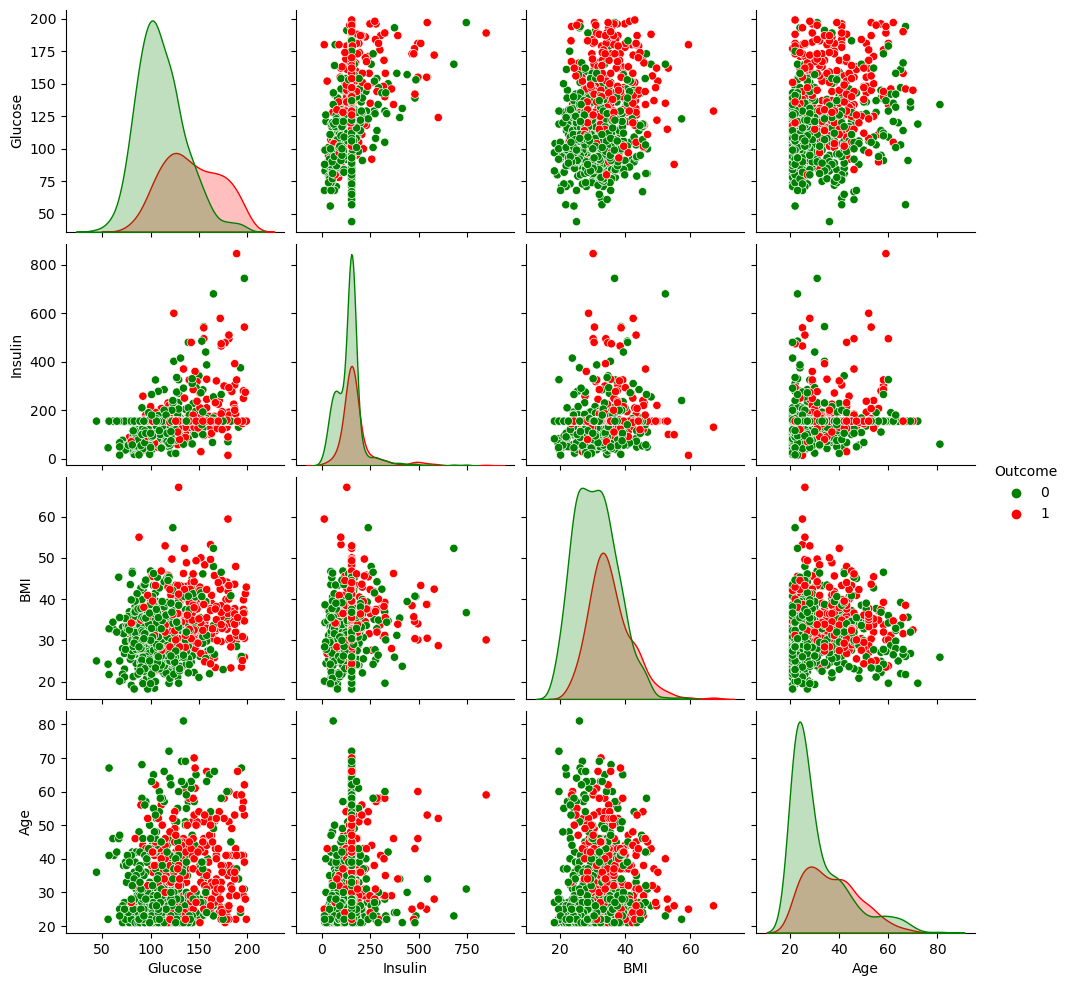

In [13]:
palette = {1:'red', 0:'green'}
columns = ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
sns.pairplot(datacleaned[columns], hue = 'Outcome', palette = palette)

### Selecting features for training our model

*For the sake of simplicity, I will select 4 features of the dataset - Glucose, Insulin, and BMI*

In [15]:
qcols = ['Glucose', 'Insulin', 'BMI', 'Outcome'] # qcols means query columns or columns of interest
df = datacleaned[qcols]
df

,Glucose,Insulin,BMI,Outcome
0,148.0,155.0,33.6,1
1,85.0,155.0,26.6,0
2,183.0,155.0,23.3,1
3,89.0,94.0,28.1,0
4,137.0,168.0,43.1,1
...,...,...,...,...
763,101.0,180.0,32.9,0
764,122.0,155.0,36.8,0
765,121.0,112.0,26.2,0
766,126.0,155.0,30.1,1


### Standardizing the variables

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
#Creating a StandardScaler() object using scaler
scaler = StandardScaler()

In [19]:
#Fitting scaler to the features
scaler.fit(df.drop('Outcome', axis = 1))

StandardScaler()

In [20]:
# Using the transform() method to transform the features to a scaled version
scaled_features = scaler.transform(df.drop('Outcome', axis = 1))

In [21]:
# Now converting the scaled features to a dataframe and checking the head of the dataframe
# to make sure scaling worked

df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [22]:
df_feat.head()

,Glucose,Insulin,BMI
0,0.865254,-0.003310,0.167240
1,-1.206013,-0.003310,-0.851551
2,2.015957,-0.003310,-1.331838
3,-1.074504,-0.721243,-0.633239
4,0.503604,0.149692,1.549885


### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

### Choosing the K Value

In [50]:
error_rate = [] # empty list

for i in range (1,90): #checking every possible value within this range
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

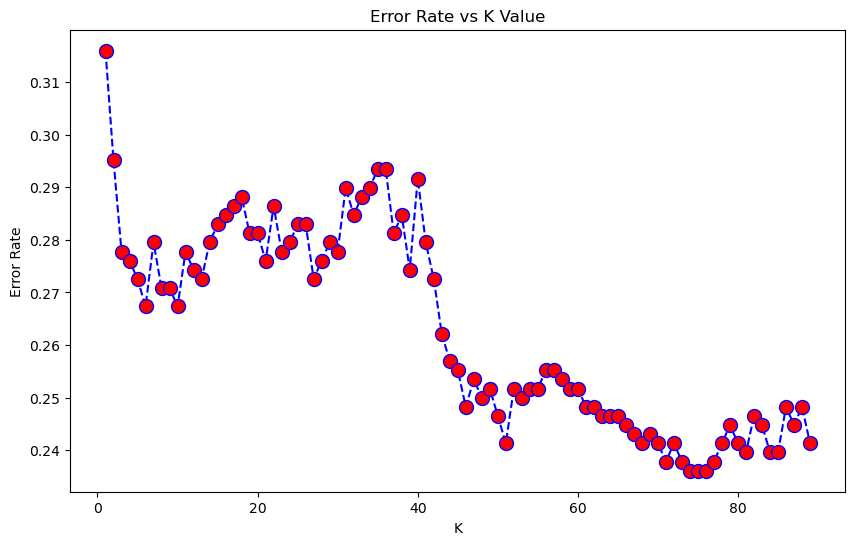

In [51]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 90), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
# Let's take the value of K to be 60

In [67]:
knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

In [68]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

### Evaluation of our KNN Model

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[324  51]
 [ 94 107]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       375
           1       0.68      0.53      0.60       201

    accuracy                           0.75       576
   macro avg       0.73      0.70      0.71       576
weighted avg       0.74      0.75      0.74       576

